In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fitting import create_ensemble, load_data, create_datasets


base_dir = "/global/cfs/cdirs/m669/rroussel/phase_space_reconstruction"
save_dir = base_dir + "/mse_scale_1_l_1e9"
quad_strengths, image_data, bins, xx = load_data(base_dir,{})


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from phase_space_reconstruction.utils import calculate_ellipse
import torch
offset = 0
# calculate rms stats from each image
covs = []
centroids = []
image_data = torch.clip(image_data, offset) - offset
for ele in image_data.transpose(-1,-2):
    centroid, cov = calculate_ellipse(ele, bins, bins)
    covs += [cov]
    centroids += [centroid]
    
covs = torch.stack(covs).sqrt().detach().cpu()
centroids = torch.stack(centroids)
print(centroids.shape)

torch.Size([21, 5, 1, 2])


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([ 4.2382,  3.8144,  3.3906,  2.9244,  2.5429,  2.1191,  1.6953,  1.2715,
         0.8476,  0.4238, -0.0000, -0.4238, -0.8476, -1.2715, -1.6953, -2.1191,
        -2.9244, -3.8144, -4.6620, -5.5097, -6.3573], dtype=torch.float64)


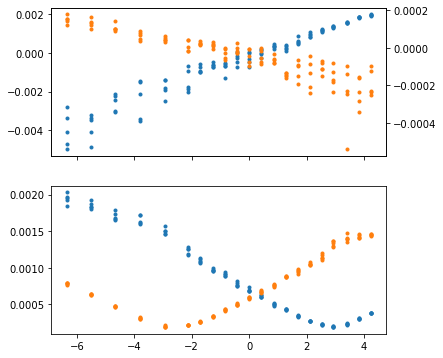

In [20]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(6,6))

# plot centroids
axb = ax[0].twinx()
axes = [ax[0],axb]
colors = ["C0","C1"]
for i in range(2):
    axes[i].plot(
        quad_strengths.detach().cpu().flatten(), 
        centroids[...,i].detach().cpu().flatten(),
        f".{colors[i]}"
    )
    
# plot covs
slices = [[0,0],[1,1]]
for i in range(2):
    ax[1].plot(
        quad_strengths.detach().cpu().flatten(),
        covs[...,slices[i][0],slices[i][1]].flatten(),
        "."
    )
print(quad_strengths[:,0].detach().cpu().flatten())          

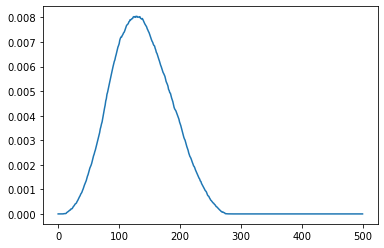

In [4]:
plt.plot(image_data[-1,0].sum(axis=-1))

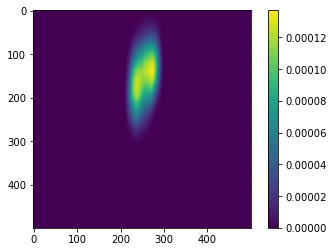

In [18]:
plt.imshow(image_data[-1].mean(dim=0))
plt.colorbar()